In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Disease Prediction/Dataset/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.bmi.mean() 

28.893236911794673

In [ ]:
data["bmi"]=data["bmi"].fillna(data["bmi"].mean()) 

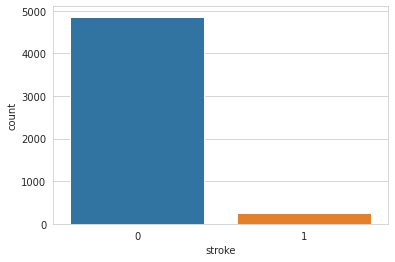

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x = 'stroke', data = data)

In [ ]:
correlation=data.corr()
print(correlation['stroke'].sort_values(ascending=False))

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.038947
id                   0.006388
Name: stroke, dtype: float64


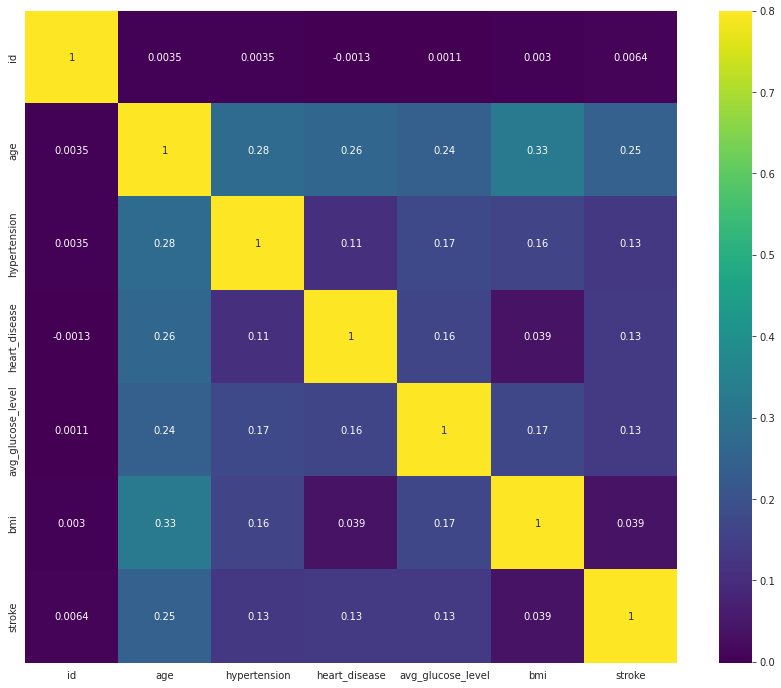

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation,annot=True,cmap='viridis',square=True,vmax=0.8)

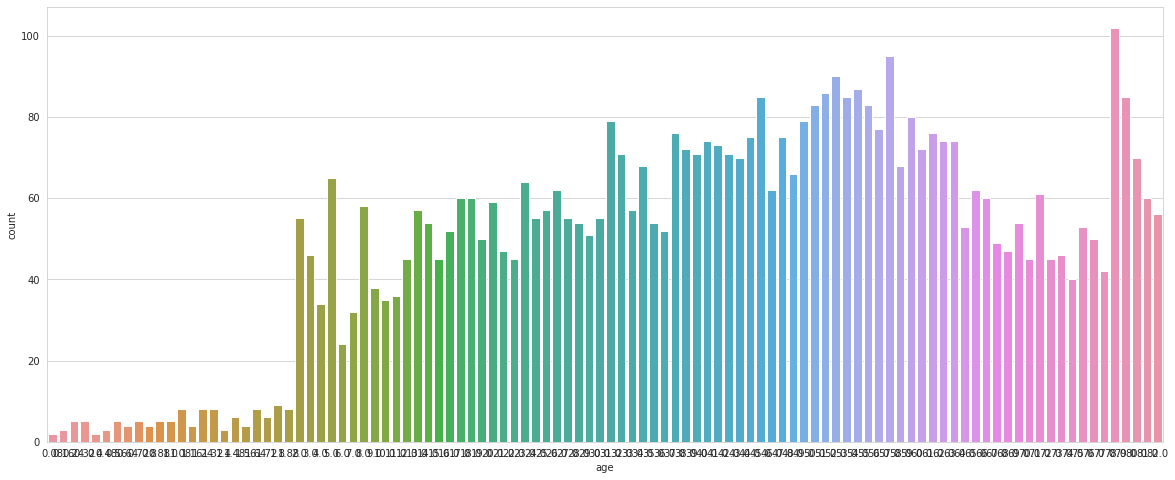

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['age'])

In [ ]:
from sklearn.preprocessing import LabelEncoder 
lbe=LabelEncoder()
data["hypertension"]=lbe.fit_transform(data["hypertension"])
data["heart_disease"]=lbe.fit_transform(data["heart_disease"])
data["ever_married"]=lbe.fit_transform(data["ever_married"])
data["work_type"]=lbe.fit_transform(data["work_type"])
data["Residence_type"]=lbe.fit_transform(data["Residence_type"])
data["smoking_status"]=lbe.fit_transform(data["smoking_status"])

data=pd.get_dummies(data)

In [ ]:
dataset = data.copy()
dataset.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other
0,9046,67.0,0,1,1,2,1,228.69,36.600000,1,1,0,1,0
1,51676,61.0,0,0,1,3,0,202.21,28.893237,2,1,1,0,0
2,31112,80.0,0,1,1,2,0,105.92,32.500000,2,1,0,1,0
3,60182,49.0,0,0,1,2,1,171.23,34.400000,3,1,1,0,0
4,1665,79.0,1,0,1,3,0,174.12,24.000000,2,1,1,0,0


In [ ]:
dataset.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
gender_Female        0
gender_Male          0
gender_Other         0
dtype: int64

In [ ]:
X = dataset.drop(['stroke'], axis = 1)
y = dataset['stroke']

In [ ]:
X.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'gender_Female', 'gender_Male', 'gender_Other'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [ ]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (4088, 13) (4088,)
Test Set:  (1022, 13) (1022,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
RANDOM_STATE = 42

model_params = {
    'SVC': {
        'model': SVC(random_state=RANDOM_STATE),
        'params' : {
            'C': [1,2,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(var_smoothing=1e-2),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'K-nearest neighbors': {
        'model': KNeighborsClassifier(),
        'params': {}
    },
    'Gradient boosting classifiers': {
        'model': GradientBoostingClassifier(
                   learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
        'params': {
            'learning_rate': [0.001, 0.01, 0.005],
            'n_estimators': [10,20,30]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [ ]:
from sklearn.model_selection import GridSearchCV

scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'Model': model_name,
        'Accuracy': clf.best_score_,
        'best_params': clf.best_params_
    })
    
result = pd.DataFrame(scores,columns=['Model','Accuracy','best_params'])

In [ ]:
comparison = result.sort_values(by = "Accuracy", ascending = False)
comparison

,Model,Accuracy,best_params
0,SVC,0.952544,"{'C': 1, 'kernel': 'rbf'}"
3,naive_bayes_gaussian,0.952544,{}
6,Gradient boosting classifiers,0.952544,"{'learning_rate': 0.001, 'n_estimators': 10}"
7,decision_tree,0.952544,{'criterion': 'entropy'}
1,random_forest,0.952300,{'n_estimators': 10}
2,logistic_regression,0.952055,{'C': 1}
5,K-nearest neighbors,0.951566,{}
4,naive_bayes_multinomial,0.607873,{}


In [ ]:
classifier1 = SVC(C=1, kernel='rbf', random_state=RANDOM_STATE)
classifier1.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [ ]:
y_pred = classifier1.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(f"Train Accuracy is: {round(classifier1.score(X_train, y_train)*100,2)}%")
print(f"Test Accuracy is : {round(classifier1.score(X_test, y_test)*100,2)}%")

Train Accuracy is: 95.25%
Test Accuracy is : 94.62%


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       967
           1       0.00      0.00      0.00        55

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


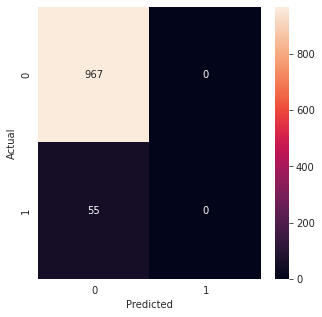

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

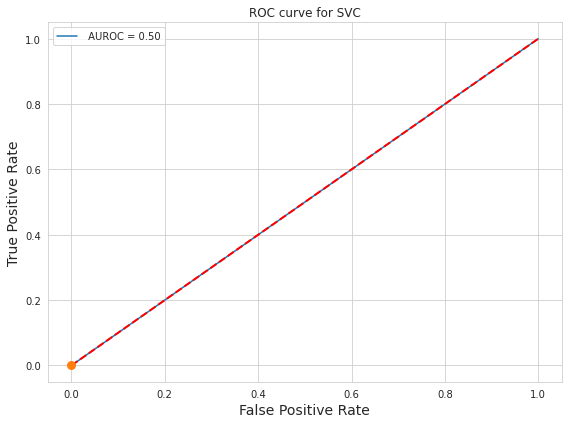

In [ ]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()